# Base syntax

In [26]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'
warnings.filterwarnings('ignore')

In [27]:
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.4.1
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [28]:
A = tf.constant([[3, 2],
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [29]:
w = tf.Variable([[1.], [2.]])
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Тензор, заполненный только единицами

In [30]:
x = tf.ones(shape=(1, 2))
print(x)

tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


Тензор, заполненный только нулями:

In [31]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Cлучайные тензоры

In [32]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.49258885]
 [ 0.54338336]
 [-0.14203006]], shape=(3, 1), dtype=float32)


In [33]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.05329436],
       [1.4172529 ],
       [1.6276457 ]], dtype=float32)>


Состояние переменной можно изменить с помощью метода assign

In [34]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [35]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Пример изменения размерности тензора - 

In [36]:
tensor = tf.constant([[3, 2],
                      [5, 2],
                      [9, 5],
                      [1, 3]])

resh_tensor = tf.reshape(tensor=tensor, shape=[1, 8])

print(f'BEFORE \n{tensor.numpy()}')
print(f'AFTER \n{resh_tensor.numpy()}')

BEFORE 
[[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER 
[[3 2 5 2 9 5 1 3]]


Пример сложения тензеров - 

In [37]:
B = tf.constant([[9, 5],
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Для переменных можно еще и так (добавить к тому. что есть)

In [38]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [39]:
A = tf.constant([[3, 7],
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)

tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


In [40]:
x = tf.matmul([[5]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Можно много всякого похожего на numpy

In [41]:
a = tf.ones((2, 2)) * 2
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


In [42]:
ndarray = np.ones([3, 3])

print("превратим numpy arrays в Tensors ")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор в  numpy array")
print(tensor.numpy())

превратим numpy arrays в Tensors 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор в  numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [43]:
# Градиент

In [44]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print('input_var : ', input_var)
print('result = input_var^2 : ', result)
print('gradient : ', gradient)

input_var :  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result = input_var^2 :  tf.Tensor(9.0, shape=(), dtype=float32)
gradient :  tf.Tensor(6.0, shape=(), dtype=float32)


Производная второго порядка:

In [45]:
input_t = tf.Variable(np.arange(10), dtype='float32')
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        x = 4.9 * input_t ** 2  # g * t^2 /2
    speed = inner_tape.gradient(x, input_t)  # g * t
acceleration = outer_tape.gradient(speed, input_t)   # g


print('x : ', x)
print('t : ', input_t)
print('v : ', speed)
print('a : ', acceleration)

x :  tf.Tensor(
[  0.         4.9       19.6       44.100002  78.4      122.5
 176.40001  240.1      313.6      396.9     ], shape=(10,), dtype=float32)
t :  <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>
v :  tf.Tensor(
[ 0.        9.8      19.6      29.400002 39.2      49.       58.800003
 68.6      78.4      88.200005], shape=(10,), dtype=float32)
a :  tf.Tensor([9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8], shape=(10,), dtype=float32)


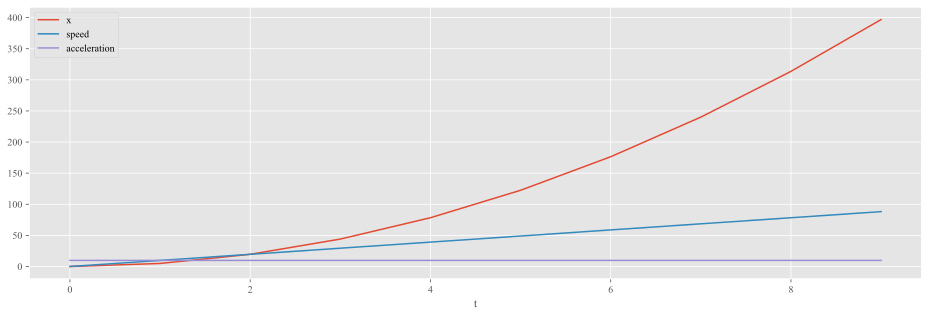

In [46]:
plt.figure(figsize=(16, 5))
plt.plot(input_t.numpy(), x.numpy(), label='x')
plt.plot(input_t.numpy(), speed.numpy(), label='speed')
plt.plot(input_t.numpy(), acceleration.numpy(), label='acceleration')
plt.legend()
plt.xlabel('t')
plt.grid('on')
plt.show()

*****************************

# Анализ работы модели по слоям

In [47]:
import tensorflow

In [48]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [49]:
# собираем сеть
level = 5
inputs = Input(shape=(28, 28, 1), name='digits')
x = Flatten()(inputs)
for i in range(level):
    #x = Dense(64, activation='relu', name='dense_'+str(i))(x)
    x = Dense(64, activation='sigmoid', name='dense_'+str(i))(x)
outputs = Dense(10, activation='sigmoid', name='predictions')(x)
modelg = Model(inputs=inputs, outputs=outputs)


# Создадим экземпляр оптимизатора.
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = tensorflow.keras.losses.MeanSquaredError()  # (from_logits=True)
# Подготовим тренировочный датасет.
batch_size = 64
train_dataset = tensorflow.data.Dataset.from_tensor_slices(
    (train_images, y_train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
# Итерируем по эпохам.
grad_log = []

epochs = 2  # учим немного, т.к. задача посмотреть , что происходит с градиентом
for epoch in range(epochs):
    print('Начинаем эпоху %d' % (epoch,))
    # Итерируем по пакетам в датасете.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # Откроем GradientTape чтобы записать операции # выполняемые во время прямого прохода,
        # включающего автодифференцирование.
        with tensorflow.GradientTape() as tape:
            # Запустим прямой проход слоя.
            # Операции применяемые слоем к своим
            # входным данным будут записаны
            # на GradientTape.
            loggits = modelg(x_batch_train)
            # loggits для пакета  - выходы модели
            # Вычислим значение потерь для этого пакета.
            y_s = y_batch_train.numpy().shape
            y = tensorflow.reshape(y_batch_train, shape=(y_s[0], 10, 1))
            l = tensorflow.reshape(loggits, shape=(y_s[0], 10, 1))
            # вызываем лосс
            loss_value = loss_fn(y, l)
            # Используем gradient tape для автоматического извлечения градиентов
            # обучаемых переменных относительно потерь.
            grads = tape.gradient(loss_value, modelg.trainable_weights)
            g_g = []
            w_w = []
            # пишем логи для сохранения значений градиента и веса по одной цепи
            # (0-й канал распространения активности)
            for g_s in grads:
                # допишем логи значений градиента в зависимости от размера тензора градиента
                if len(g_s.numpy().shape) == 1:

                    g_g.append(g_s.numpy()[0])
                if len(g_s.numpy().shape) == 2:

                    g_g.append(g_s.numpy()[0, 0])
                if len(g_s.numpy().shape) == 3:

                    g_g.append(g_s.numpy()[0, 0, 0])
                if len(g_s.numpy().shape) == 4:

                    g_g.append(g_s.numpy()[0, 0, 0, 0])

            # добавляем текущие логи по слоям к общей записи
            grad_log.append(g_g)

            # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери.
            optimizer.apply_gradients(zip(grads, modelg.trainable_weights))
            # Пишем лог каждые 200 пакетов.
            if step % 200 == 0:
                print('Потери на обучении (для одного пакета) на шаге %s: %s' %
                      (step, float(loss_value)))
                print('Уже увидели: %s примеров' % ((step + 1) * batch_size))
grad_log = np.array(grad_log)

Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.3142414093017578
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.29071807861328125
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.28260284662246704
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.26268231868743896
Уже увидели: 38464 примеров
Потери на обучении (для одного пакета) на шаге 800: 0.24698510766029358
Уже увидели: 51264 примеров
Начинаем эпоху 1
Потери на обучении (для одного пакета) на шаге 0: 0.23833739757537842
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.22856087982654572
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.21821275353431702
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.20540671050548553
Уже увидели: 38464 примеров
Потери на обучении (для одного пакета) на шаге 800: 0.1898149996995926
Уже ув

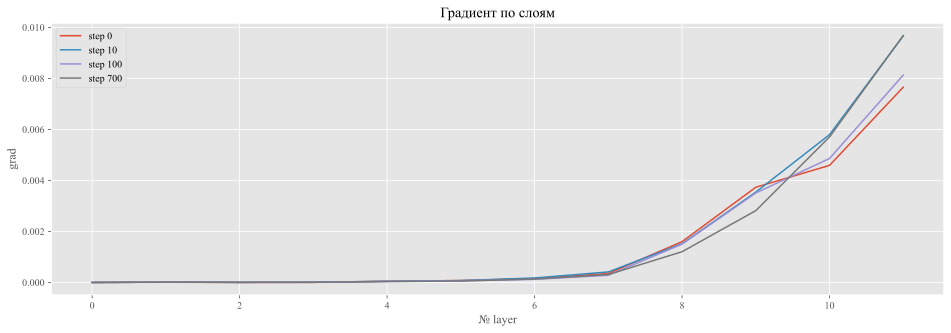

In [51]:
plt.figure(figsize=(16, 5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.plot(np.abs(grad_log[0,:]),label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.plot(np.abs(grad_log[700,:]),label='step 700')
plt.legend()
plt.show()